In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel('/content/drive/MyDrive/Historic data/T20_2.xlsx','Sheet2')

In [4]:
data.head(2)

,innings,ball,runs_off_bat,extras,Powerplay,Death,runs_striker,runs_nonstriker,CRR,Last3overruns,Last3overwkts,Total_Runs,sr_striker,sr_nonstriker,Wicket_till
0,1,0.1,0,0,1,0,0,0,0.0,0,0,188,0.0,0.0,0
1,1,0.2,0,0,1,0,0,0,0.0,0,0,188,0.0,0.0,0


In [5]:
data_new = data[data["ball"] > 6]

In [6]:
data_new.corr()

,innings,ball,runs_off_bat,extras,Powerplay,Death,runs_striker,runs_nonstriker,CRR,Last3overruns,Last3overwkts,Total_Runs,sr_striker,sr_nonstriker,Wicket_till
innings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ball,NaN,1.000000,0.107573,0.041307,NaN,0.828647,0.084657,0.039461,0.119654,0.245618,0.227595,0.041308,0.107412,0.040221,0.625503
runs_off_bat,NaN,0.107573,1.000000,-0.148307,NaN,0.094937,0.137842,0.058513,0.185016,0.131217,-0.076745,0.171429,0.130302,0.067043,-0.058701
extras,NaN,0.041307,-0.148307,1.000000,NaN,0.038796,0.008597,0.002382,0.026603,0.024734,0.007074,0.013703,0.014893,0.006360,0.018427
Powerplay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Death,NaN,0.828647,0.094937,0.038796,NaN,1.000000,0.052505,0.006183,0.118073,0.246663,0.219818,0.035870,0.109156,0.047403,0.538137
runs_striker,NaN,0.084657,0.137842,0.008597,NaN,0.052505,1.000000,0.032122,0.365577,0.426957,-0.393028,0.356105,0.515542,0.096697,-0.306464
runs_nonstriker,NaN,0.039461,0.058513,0.002382,NaN,0.006183,0.032122,1.000000,0.341461,0.384385,-0.400034,0.340394,0.098533,0.558443,-0.337133
CRR,NaN,0.119654,0.185016,0.026603,NaN,0.118073,0.365577,0.341461,1.000000,0.645738,-0.097848,0.806267,0.425229,0.414861,-0.326073
Last3overruns,NaN,0.245618,0.131217,0.024734,NaN,0.246663,0.426957,0.384385,0.645738,1.000000,-0.267374,0.545504,0.486722,0.449198,-0.195401


In [7]:
data_new.columns

Index(['innings', 'ball', 'runs_off_bat', 'extras', 'Powerplay', 'Death',
       'runs_striker', 'runs_nonstriker', 'CRR', 'Last3overruns',
       'Last3overwkts', 'Total_Runs', 'sr_striker', 'sr_nonstriker',
       'Wicket_till'],
      dtype='object')

In [8]:
data_new.isna().sum()

innings            0
ball               0
runs_off_bat       0
extras             0
Powerplay          0
Death              0
runs_striker       0
runs_nonstriker    0
CRR                0
Last3overruns      0
Last3overwkts      0
Total_Runs         0
sr_striker         0
sr_nonstriker      0
Wicket_till        0
dtype: int64

In [9]:
data_new.replace([np.inf, -np.inf], 0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [10]:
data = pd.DataFrame(data_new)

In [11]:
cols= ['ball', 'runs_off_bat', 'extras', 'Death', 'runs_striker',
       'runs_nonstriker', 'CRR', 'Last3overruns', 'Last3overwkts',
       'sr_striker', 'sr_nonstriker','Wicket_till'
       ]
x = data[cols].values
y = data['Total_Runs'].values

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 13)

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
rf = RandomForestRegressor(n_estimators = 550)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
def accuracy(y_test,y_pred):
  count = len(y_test)
  val = 0
  for i in range(count):
    if y_test[i] - 10 <= round(y_pred[i]) <= y_test[i]+ 10:
      val+=1
  return val*100/count

In [16]:
accuracy(y_test,y_pred)

67.06255846254146

In [17]:
def split(y_test,y_pred):
  for k in range(5,20,1):
    val1,val2,val3,c1,c2,c3 = 0,0,0,0,0,0
    for i in range(len(y_test)):
      if 6 < x_test[i][0] < 15:
        if y_test[i] -k <= round(y_pred[i]) <= y_test[i]+ k:
          val2+=1
        c2+=1
      if x_test[i][0] > 15:
        if y_test[i] - k<= round(y_pred[i]) <= y_test[i]+ k:
          val3+=1
        c3+=1
    print(k,val2/c2,val3,c3)

In [18]:
split(y_test,y_pred)

5 0.33786255552652206 8056 12317
6 0.3879017507185785 8812 12317
7 0.43659088929535755 9435 12317
8 0.48305896698893824 9982 12317
9 0.5239961675812211 10404 12317
10 0.562973608570682 10732 12317
11 0.6009058444386377 10998 12317
12 0.6379670760386726 11244 12317
13 0.6672763696542113 11442 12317
14 0.6961501611357895 11604 12317
15 0.7225415904537932 11743 12317
16 0.7463200069680341 11838 12317
17 0.7706645762564237 11942 12317
18 0.7909154254855849 12000 12317
19 0.8105565717272014 12073 12317


13.6
18.1
6.1
15.2
17.3
6.6
9.4
19.2
12.5
14.2


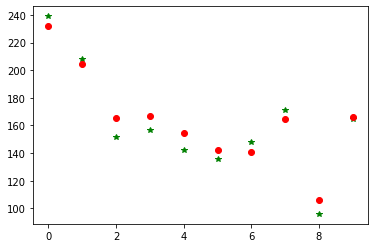

In [19]:
plt.plot(y_test[10:20],'g*', y_pred[10:20], 'ro')
for i in range(10,20):
  print(x_test[i][0])

In [20]:
accuracy(y_test,y_pred)

67.06255846254146

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8339620725285786

In [22]:
import pickle
filename = '/content/drive/MyDrive/t20_model.sav'
pickle.dump(rf, open(filename, 'wb'))


In [23]:
y_pred[10:20],y_test[10:20]

(array([231.89272727, 204.30363636, 165.40181818, 166.89272727,
        154.66545455, 142.50363636, 140.51818182, 164.67454545,
        105.82545455, 166.15818182]),
 array([239, 208, 152, 157, 142, 136, 148, 171,  96, 165]))